In [1]:
%run "..\src\utils\notebook_style.ipynb"

In [ ]:
a = 5

In [2]:
EI, x, F_A, F_B, F_C,  f_B, f_A, f_C = sp.symbols('EI x F_A F_B F_C  f_B, f_A, f_C')
c_1, c_2, c_3,c_4 = sp.symbols('c_1:5', real=True)
a_1, a_2, a_3, a_4 = sp.symbols('a_1:5', positive=True)
b_auflager, l_tot = sp.symbols('b_Auflager l_tot', positive=True)
q_x = sp.Function('q')(x)
M_x = sp.Function('M')(x)
V_x = sp.Function('V')(x)
w_x = sp.Function('w')(x)
phi_x = sp.Function('phi')(x)


Eq_list = []

# Zustandslinien für Biegeträger

Nach @Marti Kapitel 18.4:

Es wird in diesem Kapitel keine Herleitung der Beziehung zwischen Einwirkung und der Deformation dargestellt. Der Fokus liegt auf der praktischen Anwendung.




![Statisches System der Versuchsanordnung](../images/System_anordnung_2.svg){#fig-system_2}

Das Eigengewicht wird vernachlässigt aus folgenden Gründen:

- Die Punktlast $F_A$ ist massgebend am Biegemomentenverlauf beteiligt.
- Die Deformationen im Versuchsbericht aus @Jaeger2006 sind nach dem Einbau des Trägers gemessen worden. Folglich wurde die Deformation des Eigengewichts nicht aufgezeichnet.

$$
g_M, g_{k1}, g_{k2} = 0
$${#eq-eigengewicht}

Unter Berücksichtigung der Auflagerbreiten folgt das System in @fig-system_2_lager

![Angepasstes statisches System der Versuchsanordnung](../images/System_anordnung_2_lagerbreite.svg){#fig-system_2_lager}


Für konstante Biegesteifigkeit gilt:

In [3]:
params = {
    F_A : 320000*unit.N,
    b_auflager: 100*unit.mm,
    a_1: 0.11*unit.m,
    a_2:0.64*unit.m,
    a_3:0.92*unit.m,
    a_4:0.95*unit.m, 
    EI:2.17*10**7 *unit.m**2*unit.N
    
}

params_plot = param_value(params)
dict_to_table(params)

|   |   |
|---|---|
| $EI = 21700000.0 \, \text{m}^{2} \text{N}$ | $F_{A} = 320000 \, \text{N}$ |
| $a_{1} = 0.11 \, \text{m}$ | $a_{2} = 0.64 \, \text{m}$ |
| $a_{3} = 0.92 \, \text{m}$ | $a_{4} = 0.95 \, \text{m}$ |
| $b_{Auflager} = 100 \, \text{mm}$ | |


## Auflagerkräfte

Durch Gleichgewicht der Momente um Punkt C und B lassen sich die Auflagerkräfte bestimmen:

In [4]:
eq_l_tot = sp.Eq(l_tot, a_1 + a_2+a_3+a_4)

eq_l_tot_num = num_eq(eq_l_tot)
params[l_tot] = eq_l_tot_num.rhs
display(eq_l_tot,eq_l_tot_num.evalf(3))

lₜₒₜ = a₁ + a₂ + a₃ + a₄

lₜₒₜ = 2.62⋅meter

In [5]:
eq_ggw_M_C = sp.Eq(0, F_A*a_2-F_B * a_3)
eq_ggw_M_B = sp.Eq(0,F_A * (a_2+a_3)-F_C * a_3)


ggw_solve = sp.solve([eq_ggw_M_C, eq_ggw_M_B], [F_C,F_B])


display(eq_ggw_M_C, eq_ggw_M_B)

0 = F_A⋅a₂ - F_B⋅a₃

0 = F_A⋅(a₂ + a₃) - F_C⋅a₃

Daraus folgen die Reaktionskräfte:

In [6]:

eq_F_B = sp.Eq(F_B,ggw_solve[F_B])
eq_F_B_num = num_eq(eq_F_B)

eq_F_C = sp.Eq(F_C,ggw_solve[F_C])
eq_F_C_num = num_eq(eq_F_C)

display(eq_F_B_num.evalf(3), eq_F_C_num.evalf(3))

F_B = 2.23e+5⋅newton

F_C = 5.43e+5⋅newton

Um die Auflagerbreite zu berücksichtigen folgen die Kräfte zu:

In [7]:
eq_f_B = sp.Eq(f_B, F_B/b_auflager)
eq_f_B_num = num_eq(eq_f_B)
params[f_B] = eq_f_B_num.rhs

display(eq_f_B, eq_f_B_num.evalf(4))

         F_B    
f_B = ──────────
      b_Auflager

      2226.0⋅newton
f_B = ─────────────
        millimeter 

In [8]:
eq_f_C = sp.Eq(f_C, F_C/b_auflager)
eq_f_C_num = num_eq(eq_f_C)
params[f_C] = eq_f_C_num.rhs

display(eq_f_C, eq_f_C_num.evalf(4))

         F_C    
f_C = ──────────
      b_Auflager

      5426.0⋅newton
f_C = ─────────────
        millimeter 

In [9]:
eq_f_A = sp.Eq(f_A, F_A/b_auflager)
eq_f_A_num = num_eq(eq_f_A)
params[f_A] = eq_f_A_num.rhs
display(eq_f_A, eq_f_A_num.evalf(4))

         F_A    
f_A = ──────────
      b_Auflager

      3200.0⋅newton
f_A = ─────────────
        millimeter 

In [10]:
DGL_biegetraeger = sp.Eq(q_x, -EI*sp.Derivative(w,x,4))
display(DGL_biegetraeger)

             4   
            d    
q(x) = -EI⋅───(w)
             4   
           dx    

In [11]:
eq_q_x = sp.Eq(q_x, sp.Piecewise(
    (0, (x>0)&(x<=(a_1 - b_auflager/2))),
    (f_A, (x>(a_1 - b_auflager/2))&(x<(a_1 + b_auflager/2))),
    (0, (x>(a_1 + b_auflager/2))&(x<((a_1+a_2) - b_auflager/2))),
    (-f_C, (x>((a_1+a_2) - b_auflager/2))&(x<((a_1+a_2)+ b_auflager/2))),
    (0, (x>((a_1+a_2)+ b_auflager/2))&(x<((a_1+a_2+a_3) - b_auflager/2))),
    (f_B, (x>((a_1+a_2+a_3) - b_auflager/2))&(x<((a_1+a_2+a_3) + b_auflager/2))),
    (0, True)
    )).simplify()

params_plot = param_value(params)
eq_q_x_num = eq_q_x.subs(params_plot)

q_x_params = [
                a_1,
                a_2,
                a_3,
                eq_f_A_num.rhs,
                eq_f_B_num.rhs,
                eq_f_C_num.rhs,
                b_auflager
]

for param in enumerate(q_x_params):
    q_x_params[param[0]] = np.float64(unit.convert_to(param[1],[unit.m, unit.N]).subs([(unit.m,1),(unit.N,1)]).subs(params_plot))


In [12]:
q_x_lamb = sp.lambdify((x),eq_q_x_num.rhs, 'numpy')


x_array = np.linspace(0,np.float64((eq_l_tot.rhs).subs(params_plot)),1000)
q_x_array = q_x_lamb(x_array)


Der Verlauf der Einwirkungen ist der folgende. Die positive Stabseite ist strichliert dargestellt. Folglich sind Einwirkungen nach "unten" positiv definiert.

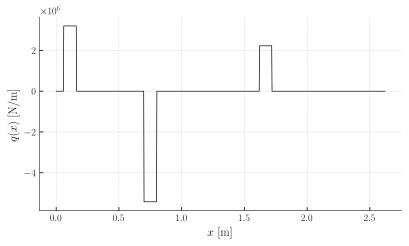

In [13]:
#| label: fig-q_x
#| fig-cap: Verlauf der Einwirkungen und Reaktionskräften
plt.plot(x_array, q_x_array, color='black')

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(q_x)}$ [N/m]')
plt.show()


Durch Integration der Einwirkung resultiert der Querkraftverlauf. Die Integrationskonstante ist hier null.

$$
V(x) = -\int q(x) + c_1
$$

In [14]:
eq_V_x = sp.Eq(-V_x,sp.integrate(eq_q_x_num.rhs, x) + c_1)
c_1_num = sp.solve(eq_V_x.rhs.subs(x,0).subs(params).subs(f_A, eq_f_A_num.rhs),c_1)[0]

V_x_solve = eq_V_x.subs(c_1, c_1_num).simplify()

V_x_lamb = sp.lambdify((x),V_x_solve.rhs, 'numpy')

V_x_array = V_x_lamb(x_array)

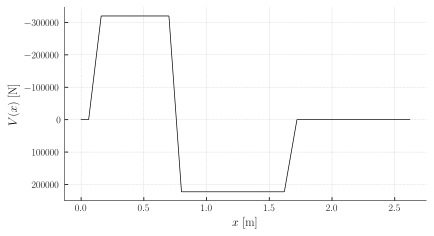

In [15]:
#| label: fig-V_X
#| fig-cap: Verlauf der Querkräfte 

plt.plot(x_array, V_x_array, color='black')
plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(V_x)}$ [N]')
plt.show()


Der Verlauf der Biegemoment lässt sich durch Integration der Querkräfte bestimmen:

In [16]:
eq_M_x = sp.Eq(M_x, sp.integrate(V_x_solve.rhs,x)+c_2)
c_2_num = sp.solve(eq_M_x.subs(x,0).rhs.subs(params), c_2)[0]
M_x_solve = eq_M_x.subs(c_2, c_2_num).simplify()
M_x_lamb = sp.lambdify((x,a_1, a_2, a_3, f_A, f_B, f_C, b_auflager),M_x_solve.rhs, 'numpy')

M_x_array = M_x_lamb(x_array, *q_x_params)


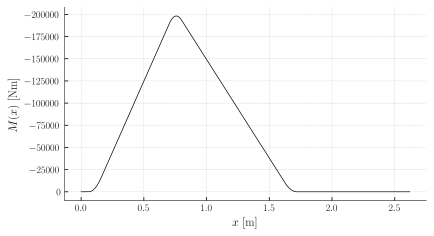

In [17]:
#| label: fig-M_x
#| fig-cap: Verlauf der Biegemomente 

plt.plot(x_array, M_x_array, color='black')
plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(M_x)}$ [Nm]')
plt.show()

In [18]:
eq_phi_x = sp.Eq(phi_x, sp.integrate(M_x_solve.rhs/EI,x)+c_3)


In [19]:
# phi_x_array = integrate.cumtrapz(M_x_array, x_array, initial=0) / EI.subs(params_plot) + c_3


# #| label: fig-phi_x
# #| fig-cap: Verlauf der Deformation 

# plt.plot(x_array, phi_x_array, color='black')
# plt.xlabel(f'${sp.latex(x)}$ [m]')
# plt.ylabel(f'${sp.latex(phi_x)}$ [rad]')
# plt.show()

Die Deformationen entsprechen dem Integrierten Verlauf der Biegemomente, dividiert durch die Biegesteifigkeit, welche als konstant angesetzt wird.

In [20]:
eq_w_x = sp.Eq(w_x, sp.integrate(eq_phi_x.rhs, x)+ c_4)
eq_w_x.subs(params_plot)
c_solve = sp.solve([eq_w_x.rhs.subs(x,a_1 + a_2).subs(params_plot), eq_w_x.rhs.subs(x,a_1 + a_2+a_3).subs(params_plot)],[c_3, c_4])


eq_w_x_solve = eq_w_x.subs(c_solve).subs(params_plot)


w_x_lamb = sp.lambdify(x,eq_w_x_solve.rhs)

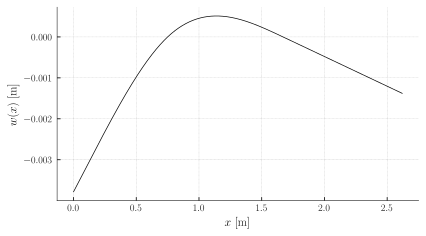

In [21]:
w_x_array = w_x_lamb(x_array)


#| label: fig-w_x
#| fig-cap: Verlauf der Deformation 

plt.plot(x_array, w_x_array, color='black')
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(w_x)}$ [m]')
plt.show()